In [33]:
# Import the pandas library as a pd. Load the two datasets user_data and logs. 
# Check table size, variable types, missing values, descriptive statistics.
import pandas as pd
import seaborn as sns

In [8]:
user_data = pd.read_csv('C:/Users/stask/Analitics_Karpov/Module3/user_data.csv')
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [6]:
logs = pd.read_csv('C:/Users/stask/Analitics_Karpov/Module3/logs.csv')
logs.platform.value_counts()

phone       2753
computer    1505
tablet       242
Name: platform, dtype: int64

In [21]:
# Which client performed the most successful operations? (success == True)
logs.query('success == True').client.value_counts().head(10)

28719    41
52870    41
61468    41
61473    41
12179    41
82563    41
36165    41
92584    41
78349    41
64064    40
Name: client, dtype: int64

In [24]:
# Which platform has the most successful transactions?
logs.query('success == True').platform.value_counts()

phone       2019
computer    1090
tablet       180
Name: platform, dtype: int64

In [60]:
# Which platform do premium customers prefer?
user_data.merge(logs, on='client', how='inner') \
    .query('premium == True') \
    .platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

In [62]:
user_data.merge(logs, on='client', how='inner') \
    .query('premium == True') \
    .platform.value_counts().idxmax()

'phone'

In [63]:
# Visualize the distribution of customer age by customer type (premium or non-premium)

<AxesSubplot:xlabel='count', ylabel='age'>

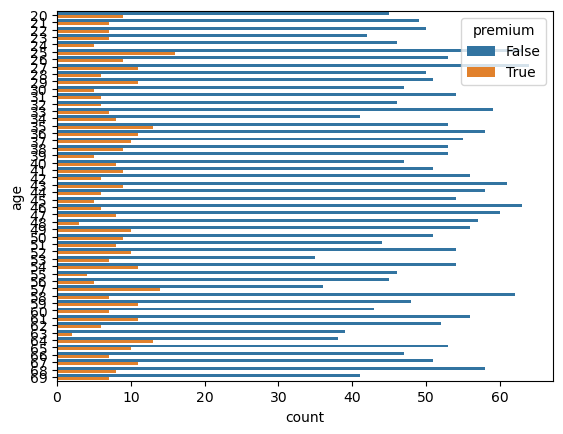

In [65]:
sns.countplot(data=user_data, y="age", hue="premium")

<AxesSubplot:xlabel='age', ylabel='Count'>

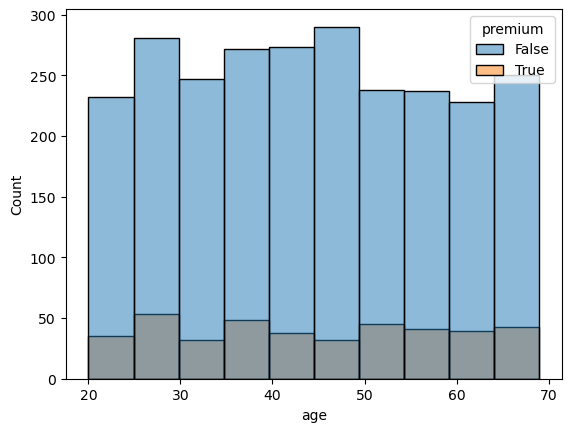

In [59]:
sns.histplot(data=user_data, x='age', hue='premium', bins=10, kde=False)

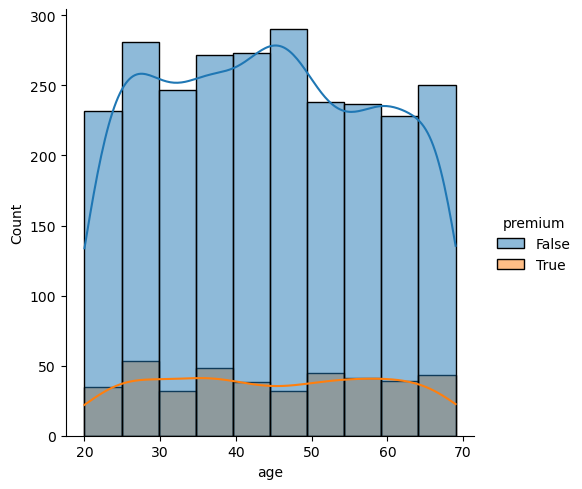

In [68]:
sns.displot(data=user_data, x='age', hue='premium', kind='hist', bins=10, kde=True)

<AxesSubplot:xlabel='platform', ylabel='count'>

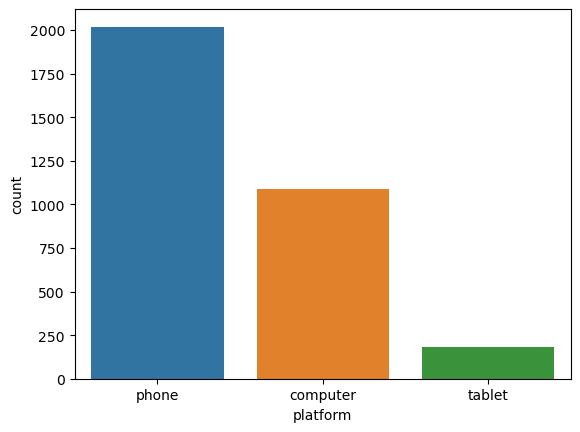

In [82]:
# Graph the distribution of the number of successful transactions
success_logs = logs.query('success == True')['platform'].reset_index()

sns.countplot(data=success_logs, x="platform")

<AxesSubplot:xlabel='platform', ylabel='count'>

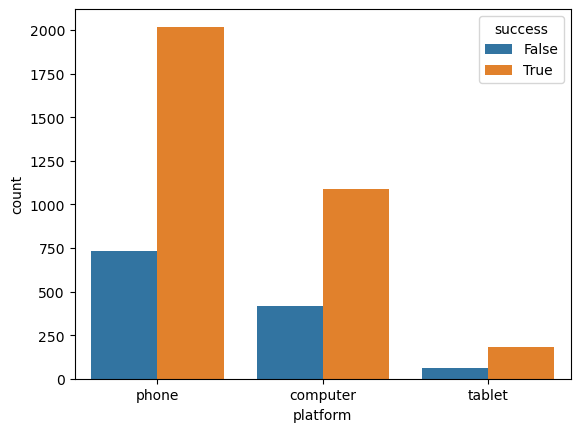

In [83]:
sns.countplot(data=logs, x="platform", hue='success')

<AxesSubplot:xlabel='age', ylabel='count'>

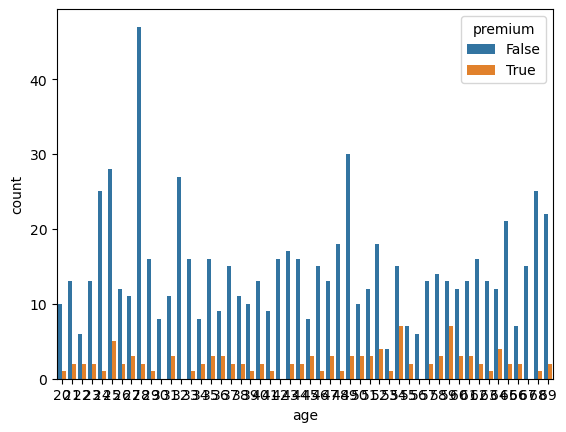

In [91]:
# Visualize the number of successful transactions made on the computer platform 
# according to age using sns.countplot (x - age, y - number of successful transactions). 
# Which age customers had the highest number of successful transactions?
success_transactions = user_data.merge(logs, on='client', how='inner') \
    .query('success == True & platform == "computer"')
sns.countplot(data=success_transactions, x="age", hue='premium')

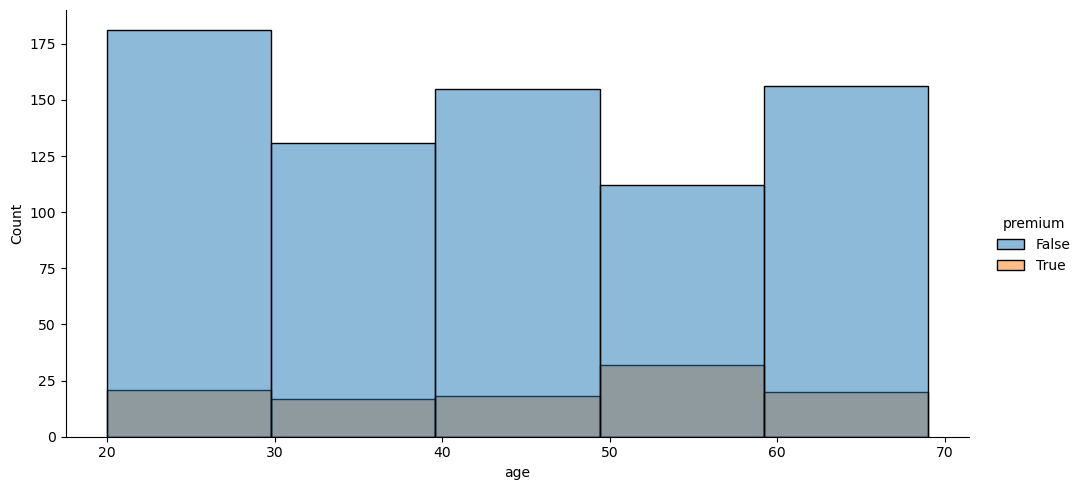

In [100]:
ax1 = sns.displot(x="age", data=success_transactions,hue='premium', height=5, aspect=2, bins=5, kind='hist')